### Training of modified U-Net for Optic Disc on DRISHTI-GS database

In [1]:
%load_ext autoreload
%autoreload 2

import tensorflow as tf
import matplotlib.pyplot as plt
import h5py

from model import *
from process_images import *
from process_result import *

print('Keras version:', keras.__version__)
print('TensorFlow version:', tf.__version__)

Keras version: 2.5.0
TensorFlow version: 2.5.0


#### DRISHTI-GS

Carrega imagens de treino e teste com tamanho 512px.

In [2]:
h5f = h5py.File(os.path.join(os.path.dirname(os.getcwd()), 'data', 'hdf5_datasets', 'DRISHTI_GS.hdf5'), 'r')
#-----------------------------------------------------------------------------------------------------------#
img_train = h5f['DRISHTI-GS/512 px/images']
cup_train = h5f['DRISHTI-GS/512 px/cup']
disc_train = h5f['DRISHTI-GS/512 px/disc']
disc_locations = h5f['DRISHTI-GS/512 px/disc_locations']
disc_locations_cup = h5f['DRISHTI-GS/512 px/disc_locations_20']

img_test = h5f['DRISHTI-GS-test/512 px/images']
cup_test = h5f['DRISHTI-GS-test/512 px/cup']
disc_test = h5f['DRISHTI-GS-test/512 px/disc']
disc_locations_test = h5f['DRISHTI-GS-test/512 px/disc_locations']
disc_locations_cup_test = h5f['DRISHTI-GS-test/512 px/disc_locations_20']

#### Generator of augmented data:

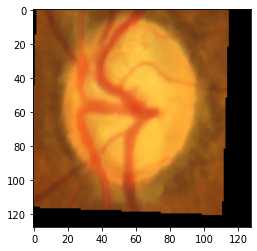

In [8]:
gen = data_generator(img_train, cup_train, disc_locations_cup, 128, 'train', batch_size=1)
batch = next(gen)
plt.imshow(batch[0][0])

In [ ]:
img_size = IMG_SIZE

X_test, Y_test = next(data_generator(img_test, cup_test, disc_locations_cup_test, img_size,  train_or_test='test', batch_size=100, stationary=True))
len(X_test), len(Y_test)

### Training and testing cup

In [ ]:
epochs = NUM_EPOCHS
spe = SPE
model = create_compile_model(img_size, 3e-4)
history_cup = train_cup(img_train, 
                    cup_train, 
                    disc_locations_cup, 
                    'cup_color', 
                    model, epochs, X_test, Y_test, img_size, spe)

### Visual check

In [ ]:
pred_iou, pred_dice, pred_cup = predict(img_test, X_test, Y_test, model, img_size)

In [ ]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

In [ ]:
print(np.std(pred_iou))
print(np.std(pred_dice))

In [ ]:
X_test, Z_test = next(data_generator(img_test, disc_test, disc_locations_test, img_size, train_or_test='test', batch_size=100, stationary=True))

In [ ]:
img_size = 256
model_disc = create_compile_model(img_size, 1e-3)

history_disc = train_disc(img_train, 
                     disc_train, 
                     disc_locations, 
                     'disc_color', 
                     model_disc, epochs, X_test, Z_test, img_size, spe)

In [ ]:
pred_iou, pred_dice, pred_disc = predict(img_test, X_test, Z_test, model_disc, img_size)

In [ ]:
print(np.mean(pred_iou))
print(np.mean(pred_dice))

In [ ]:
print(np.std(pred_iou))
print(np.std(pred_dice))

In [ ]:
plot_results(history_cup, epochs)

In [ ]:
plot_results(history_disc, epochs)

In [ ]:
df, diametros = create_table_result(pred_cup, pred_disc, test_idx, 'rgb_color')

In [ ]:
df

In [ ]:
diametros